# Stroke Risk Prediction Model: Johns Hopkins Hospital

## Introduction

### Background

In this project I will explore dataset designed to identify stroke risk in patients. Stroke is a major global health concern, ranking as the second leading cause of death worldwide. It is also a leading cause of disability. Annually, millions experience strokes, and a significant number of these result in death. After data exploration and analysis, I will build, train and deploy a model which could predict whether patients is likely to have stroke or not, based on parameters like age, gender, lifestyle choices, bmi and so on. 

### Problem

It’s hard to spot which patients are at high risk of stroke, making it tough to catch it early and prevent it.

### Goal

To build a model that helps doctors spot patients at higher risk of stroke early so they can take action and help prevent deaths.

### Hypotheses

5 hypotheses I want to explore:

1. Older age increases likelyhood of stroke.
- **H₀:** Age is not associated with stroke risk.
- **H₁:** Increasing age is associated with higher stroke risk

2. Males are more likely to have a stroke than females.
- **H₀:** Gender has no effect on stroke risk.
- **H₁:** Male patients have a higher probability of experiencing a stroke than female patients.

3. Obesity increases risk of a stroke.
- **H₀:** BMI is not associated with stroke risk.
- **H₁:** Higher BMI is associated with an increased likelihood of stroke.

4. Smokers or former smokers have increased chance of having a stroke
- **H₀:** Smoking status is not associated with stroke risk.
- **H₁:** Smoking is associated with an increased risk of stroke.

5. Having a hypertension increases chances of having a stroke
- **H₀:** Hypertension is not associated with stroke risk.
- **H₁:** Patients with hypertension have higher odds of experiencing a stroke.

### Scope

The analysis scope includes :

- Data cleaning and preparation.
- Descriptive analysis of patient demographics and health indicators.
- Formulation and testing of clear, interpretable hypotheses about risk factors.
- Development of various  models to predict stroke likelihood.
- Interpretation of results to inform potential early intervention strategies.

The project is limited to the variables available in the provided dataset and does not incorporate external medical records or real-time clinical data. The findings are intended for educational and exploratory purposes and do not replace professional medical advice.

### Evaluation Metrics

**Main Evaluation Metric:** Macro F1 Score. Balances precision and recall across classes to ensure fair assesment of performance on both stroke and non-strokes case in an imbalanced dataset.

**Secondary Evaluation Metrics:**
- Recall. Measures the ability to correctly indentify true stroke cases.
- Precision. Assesses how many predicted stroke cases are actually correct.
- ROC-AUC. It evaluates the model's ability to distinquish betweeen strokes and non-stroke cases.
- Confusion Matrix. Provides detailed breakdown of correct and incorrect predictions.

## Data Overview and Splitting

### Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.lines as mlines

### Data Source and Loading the Data

Data source is Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

Loading the data and making a copy of it:

In [38]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [39]:
df = data.copy()

### Feature Definitions

- **id**: Unique patient identifier (integer).  
- **gender**: Patient gender (Male, Female, or Other).  
- **age**: Patient age in years (float).  
- **hypertension**: Binary indicator of hypertension (0 = No, 1 = Yes).  
- **heart_disease**: Binary indicator of heart disease (0 = No, 1 = Yes).  
- **ever_married**: Marital status (Yes/No).  
- **work_type**: Type of employment (e.g., Private, Self-employed, Govt_job, Children, Never_worked).  
- **Residence_type**: Urban or Rural residence.  
- **avg_glucose_level**: Average blood glucose level (float).  
- **bmi**: Body Mass Index (float).
- **smoking_status**: Smoking status (Never smoked, Formerly smoked, Smokes, Unknown).  
- **stroke**: Target variable indicating stroke occurrence (0 = No, 1 = Yes).

### General Data Overview

Checking the columns:

In [40]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The ID column is unnecessary and provides no value, I can drop it:

In [41]:
df.drop(columns=["id"], inplace=True)

Checking the shape of the dataset:

In [42]:
df.shape

(5110, 11)

Previewing the tail of the data set:

In [43]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


**Interpretation:** Sample data shows varied patient details with some missing BMI values and cathegorical features needing encoding.

In [44]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Interpretation:** 

- Numerical features show wide ranges: age spans from infancy to 82, average glucose levels and BMI have high variability.

- Stroke prevalence is low, about 5%, suggesting that there's class imbalance.

- Again confirmed that BMI has missing values.

### Splitting the Data

I will split data early to avoid data leakage.

Defining features and target:

In [45]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

Splitting into training and testing sets:

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Confirming shapes:

In [47]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (3577, 10)
Testing set size: (1533, 10)


**Interpretation:** I splitted data to 70/30 instead of 80/20, to ensure sufficient stroke cases in the test set for evaluation, adressing the class imbalance, dataset size and possibly improving the reliability of performance metrics.

## Data Cleaning (Training Data)

Checking for duplicates:

In [48]:
df.duplicated().sum()

np.int64(0)

Confirming missing values:

In [49]:
df.isnull().sum().sum()

np.int64(201)

In [50]:
df[df["bmi"].isnull()].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,0.0,201.000000
mean,52.049154,0.233831,0.164179,126.724627,NaN,0.199005
std,22.276181,0.424323,0.371363,59.240322,NaN,0.400249
min,0.480000,0.000000,0.000000,57.520000,NaN,0.000000
25%,37.000000,0.000000,0.000000,81.430000,NaN,0.000000
50%,58.000000,0.000000,0.000000,99.870000,NaN,0.000000
75%,71.000000,0.000000,0.000000,191.790000,NaN,0.000000
max,82.000000,1.000000,1.000000,260.850000,NaN,1.000000


**Interpretation:** Exploration shows BMI is more often missing in older, higher-risk patients. To reduce bias, median imputation within age groups will be applied instead of single global median.

Binning age into groups:

In [51]:
age_bins = [0, 1, 4, 12, 19, 39, 59, 64, 120]
age_labels = [
    "Infant",
    "Toddler",
    "Child",
    "Teen",
    "Young Adult",
    "Middle-Aged Adult",
    "Senior Adult",
    "Elderly",
]

Creating age_group column:

In [52]:
df["age_group"] = pd.cut(
    df["age"], bins=age_bins, labels=age_labels, right=True, include_lowest=True
)

Imputing BMI withing age groups:

In [53]:
df["bmi"] = df.groupby("age_group", observed=False)["bmi"].transform(
    lambda x: x.fillna(x.median())
)

Confirming the change:

In [54]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group'],
      dtype='object')

Confirming there no missing values left:

In [55]:
df.isnull().sum().sum()

np.int64(0)

**Interpretation:** 

- Age was binned into clinically meaningful groups and new column of age group was created. 

- Missing BMI values were impurted using the median BMI withing each age group to reduce bias and reflect age-specific health profiles.

Checking distribution of genders:

In [ ]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Since there is only 1 record of Other gender, I will delete it since it gives me not enough data to learn patterns:

In [ ]:
df = df[df["gender"].isin(["Male", "Female"])]

Confirming changes:

In [ ]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

### Outliers

Defining numerical columns:

In [56]:
num_cols = ["age", "avg_glucose_level", "bmi"]

Visualizing it in a boxplots:

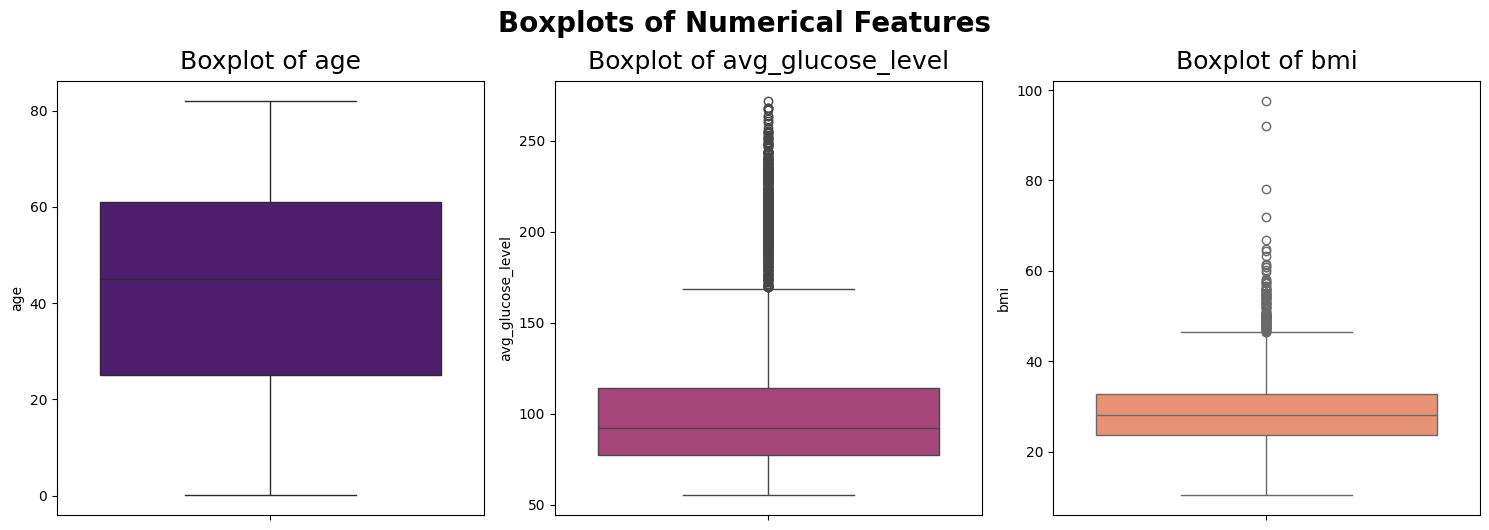

In [57]:
colors = sns.color_palette("magma", n_colors=3)

plt.figure(figsize=(15, 5))
for i, (col, color) in enumerate(zip(num_cols, colors), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=color)
    plt.title(f"Boxplot of {col}", fontsize=18, y=1.01)

plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features", fontsize=20, y=1.05, weight="bold")
plt.show()

**Interpretation:** 

- Age feature does not have extreme outliers, 

- BMI and average glucose level has some way higher values than usual, which could be considerable outliers. 

- BMI >60–70 is possible but extremely rare.

- Avg glucose has extreme high outliers (250+)








Logging average glucose values:

In [58]:
df["avg_glucose_level_log"] = np.log(df["avg_glucose_level"])

Capping BMI:

In [59]:
upper_limit_bmi = df["bmi"].quantile(0.99)
df["bmi_capped"] = np.where(df["bmi"] > upper_limit_bmi, upper_limit_bmi, df["bmi"])

In [60]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group', 'avg_glucose_level_log',
       'bmi_capped'],
      dtype='object')

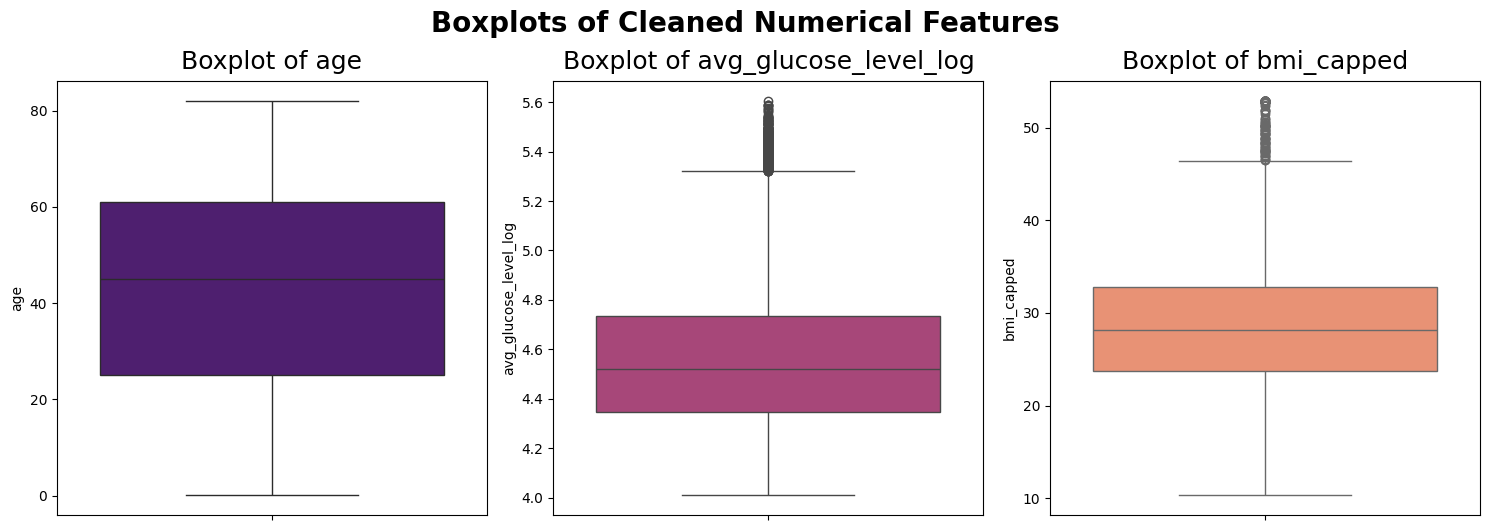

In [61]:
num_cols = ["age", "avg_glucose_level_log", "bmi_capped"]

colors = sns.color_palette("magma", n_colors=3)

plt.figure(figsize=(15, 5))
for i, (col, color) in enumerate(zip(num_cols, colors), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=color)
    plt.title(f"Boxplot of {col}", fontsize=18, y=1.01)

plt.tight_layout()
plt.suptitle(
    "Boxplots of Cleaned Numerical Features", fontsize=20, y=1.05, weight="bold"
)
plt.show()

**Interpretation:** 

- Outliers successfully dealt with. 

- BMI was capped at 99% percentile limit to lower the influence of extreme outliers and preserve interprebility.

- To preserve relative difference avg_glucose values were logged to reduce skewness.

### Cathegorical Encoding Plan

Reviewing cathegorical rows values:

| Variable        | Categories                             |
| --------------- | ---------------------------------------------- |
| gender          | Male, Female                          |
| ever\_married   | Yes, No                                        |
| work\_type      | Private, Govt\_job, Self-employed, etc.        |
| Residence\_type | Urban, Rural                                   |
| smoking\_status | never smoked, formerly smoked, smokes, Unknown |
| age\_group      | Infant, Toddler, Child, Teen, etc.             |


For variables with only 2 categories I will use Binary encoding (0/1):
- gender
- ever_married
- residence_type

For variables with 3 categories or more I will use OneHot Encoding. That includes:

- work_type
- smoking_status
- age_group

## EDA: Univariate Analysis

### Numerical Variables Distribution

In [ ]:
num_cols_cleaned = ["age", "avg_glucose_level_log", "bmi_capped"]

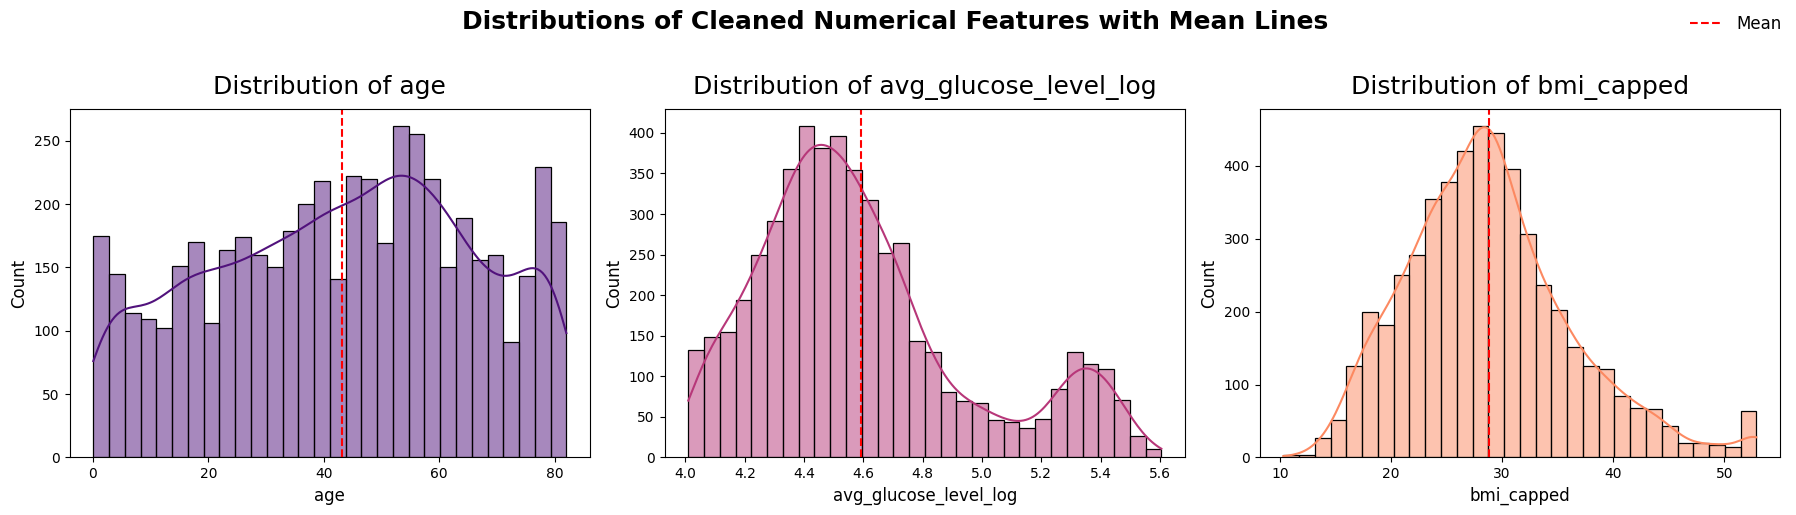

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col, color in zip(axes, num_cols_cleaned, colors):
    sns.histplot(df[col], bins=30, kde=True, color=color, ax=ax)
    ax.set_title(f"Distribution of {col}", fontsize=18, y=1.02)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    mean_val = df[col].mean()
    ax.axvline(mean_val, color="red", linestyle="--")

plt.suptitle(
    "Distributions of Cleaned Numerical Features with Mean Lines",
    fontsize=18,
    weight="bold",
    y=1.02,
)

mean_line_legend = mlines.Line2D([], [], color="red", linestyle="--", label="Mean")

fig.legend(handles=[mean_line_legend], loc="upper right", fontsize=12, frameon=False)

plt.tight_layout()
plt.show()

**Interpretation:**

- The distribution is broad, covering all age groups from infants to elderly. The typical age of people in this dataset is around 43.
- Avg_glucose_level_log ≈ 4.45 which translates to roughly ~84 mg/dL which is normal glucose level. Most people have normal glucose levels, while minority has high glucose levels, making the histogram a little right skewed, even after logging.
- The typical BMI in this dataset is about 29, in the overweight range. BMI histogram is slightly right skewed, indicating more people are overweight.


### Cathegorical Variables Distribution

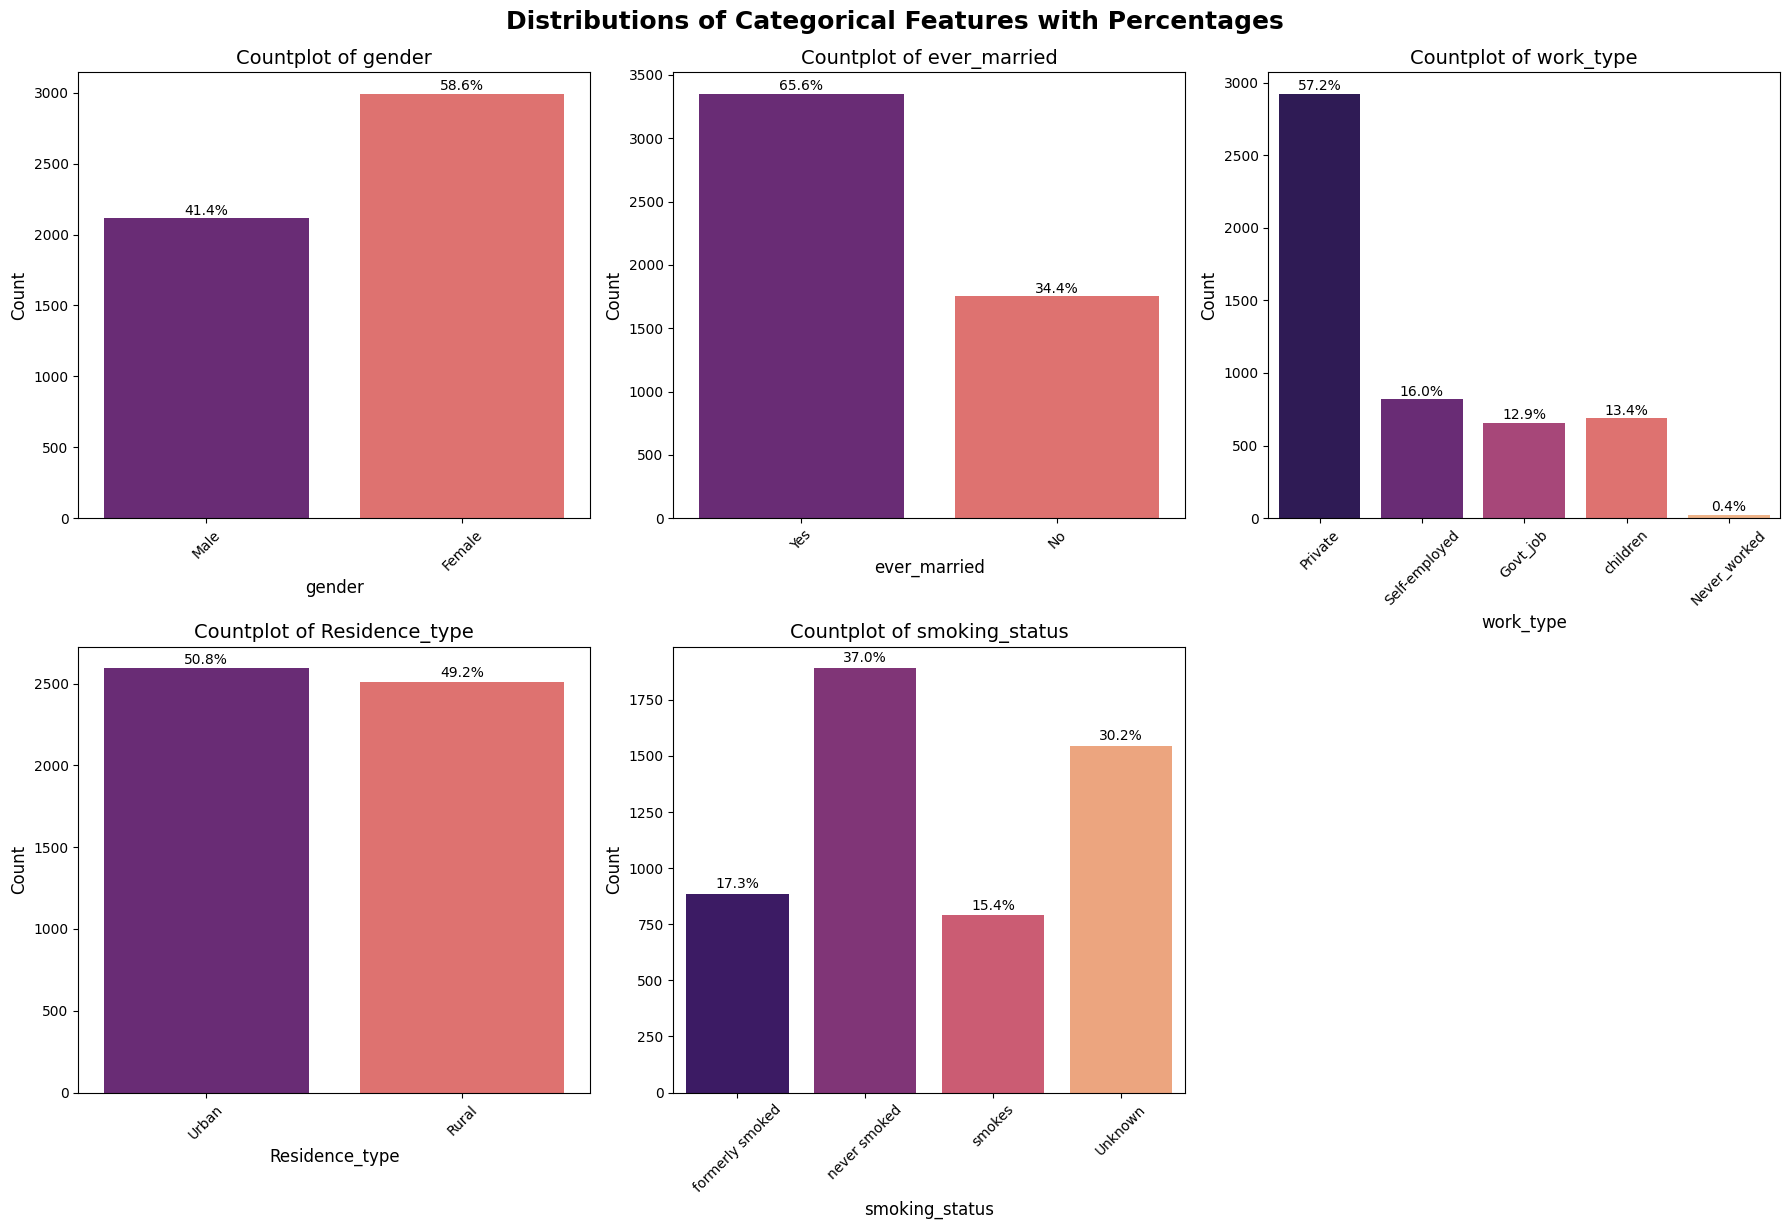

In [ ]:
cat_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols, 1):
    n_colors = df[col].nunique()
    palette = sns.color_palette("magma", n_colors=n_colors)

    plt.subplot(2, 3, i)
    ax = sns.countplot(x=col, hue=col, data=df, palette=palette, legend=False)

    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percent = 100 * height / total
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + total * 0.005,
            f"{percent:.1f}%",
            ha="center",
            fontsize=10,
        )

    ax.set_title(f"Countplot of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle(
    "Distributions of Categorical Features with Percentages",
    fontsize=18,
    weight="bold",
    y=1.02,
)
plt.show()

**Interpretation:** 

- Gender and residence type are balanced.
- Most patients are married and work in the private sector.
- Smoking status includes many with unknown or never-smoked records.

### Binary Variables Distribution

/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_25469/3764094660.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='magma')
/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_25469/3764094660.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='magma')


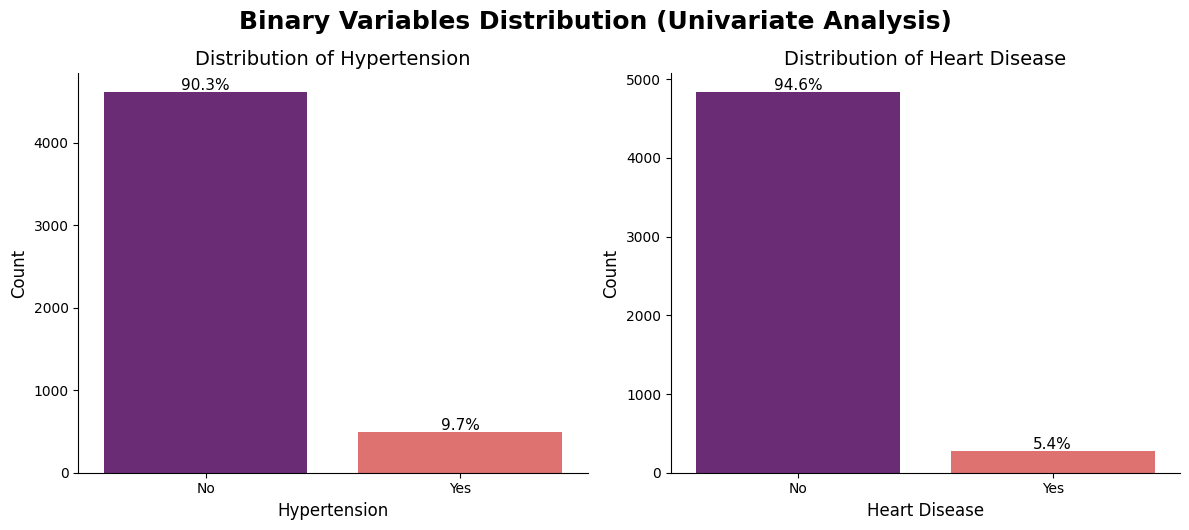

In [ ]:
# Binary columns to analyze
binary_cols = ["hypertension", "heart_disease"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(binary_cols, 1):
    plt.subplot(1, 2, i)
    ax = sns.countplot(x=col, data=df, palette="magma")
    plt.title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks([0, 1], ["No", "Yes"])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add percentages
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percent = 100 * height / total
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + total * 0.005,
            f"{percent:.1f}%",
            ha="center",
            fontsize=11,
        )

plt.tight_layout()
plt.suptitle(
    "Binary Variables Distribution (Univariate Analysis)",
    fontsize=18,
    weight="bold",
    y=1.05,
)
plt.show()

**Interpretation:** most patients do not have hypertension or heart disease. Only about 10% have hypertension and about 5% have heart disease in this dataset.

## EDA: Bivariate Analysis

### Numerical Features vs Stroke Status

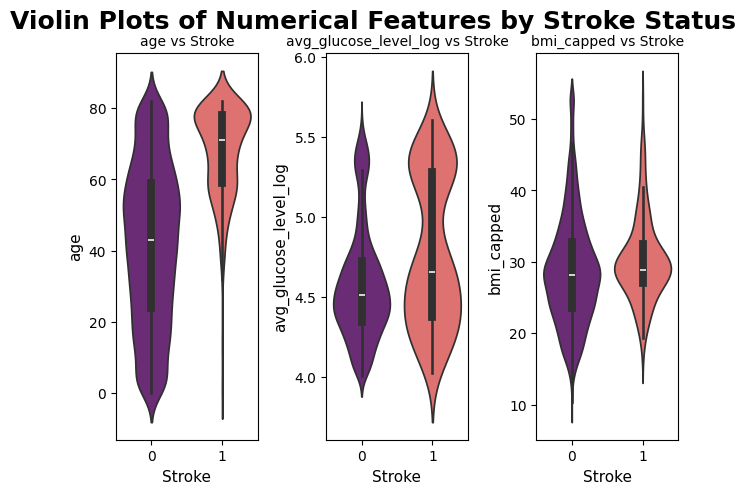

In [ ]:
for i, col in enumerate(num_cols_cleaned, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(
        x="stroke", y=col, data=df, palette="magma", hue="stroke", legend=False
    )
    plt.title(f"{col} vs Stroke", fontsize=10)
    plt.xlabel("Stroke", fontsize=11)
    plt.ylabel(col, fontsize=11)

plt.tight_layout()
plt.suptitle(
    "Violin Plots of Numerical Features by Stroke Status",
    fontsize=18,
    weight="bold",
    y=1.02,
)
plt.show()

**Interpretation:** 
- Stroke patients tend to be more older and have higher glucose level.
- BMI appears similar with slight differences.

**Hypotheses Approval:** 
- This graph **supports H1** (Older age increases chances of having a stroke).
- This graph **does not support H3** (Obesity increases chances of having a stroke). The difference is too small.

### Categorical Features vs Stroke Status

In [ ]:
cat_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

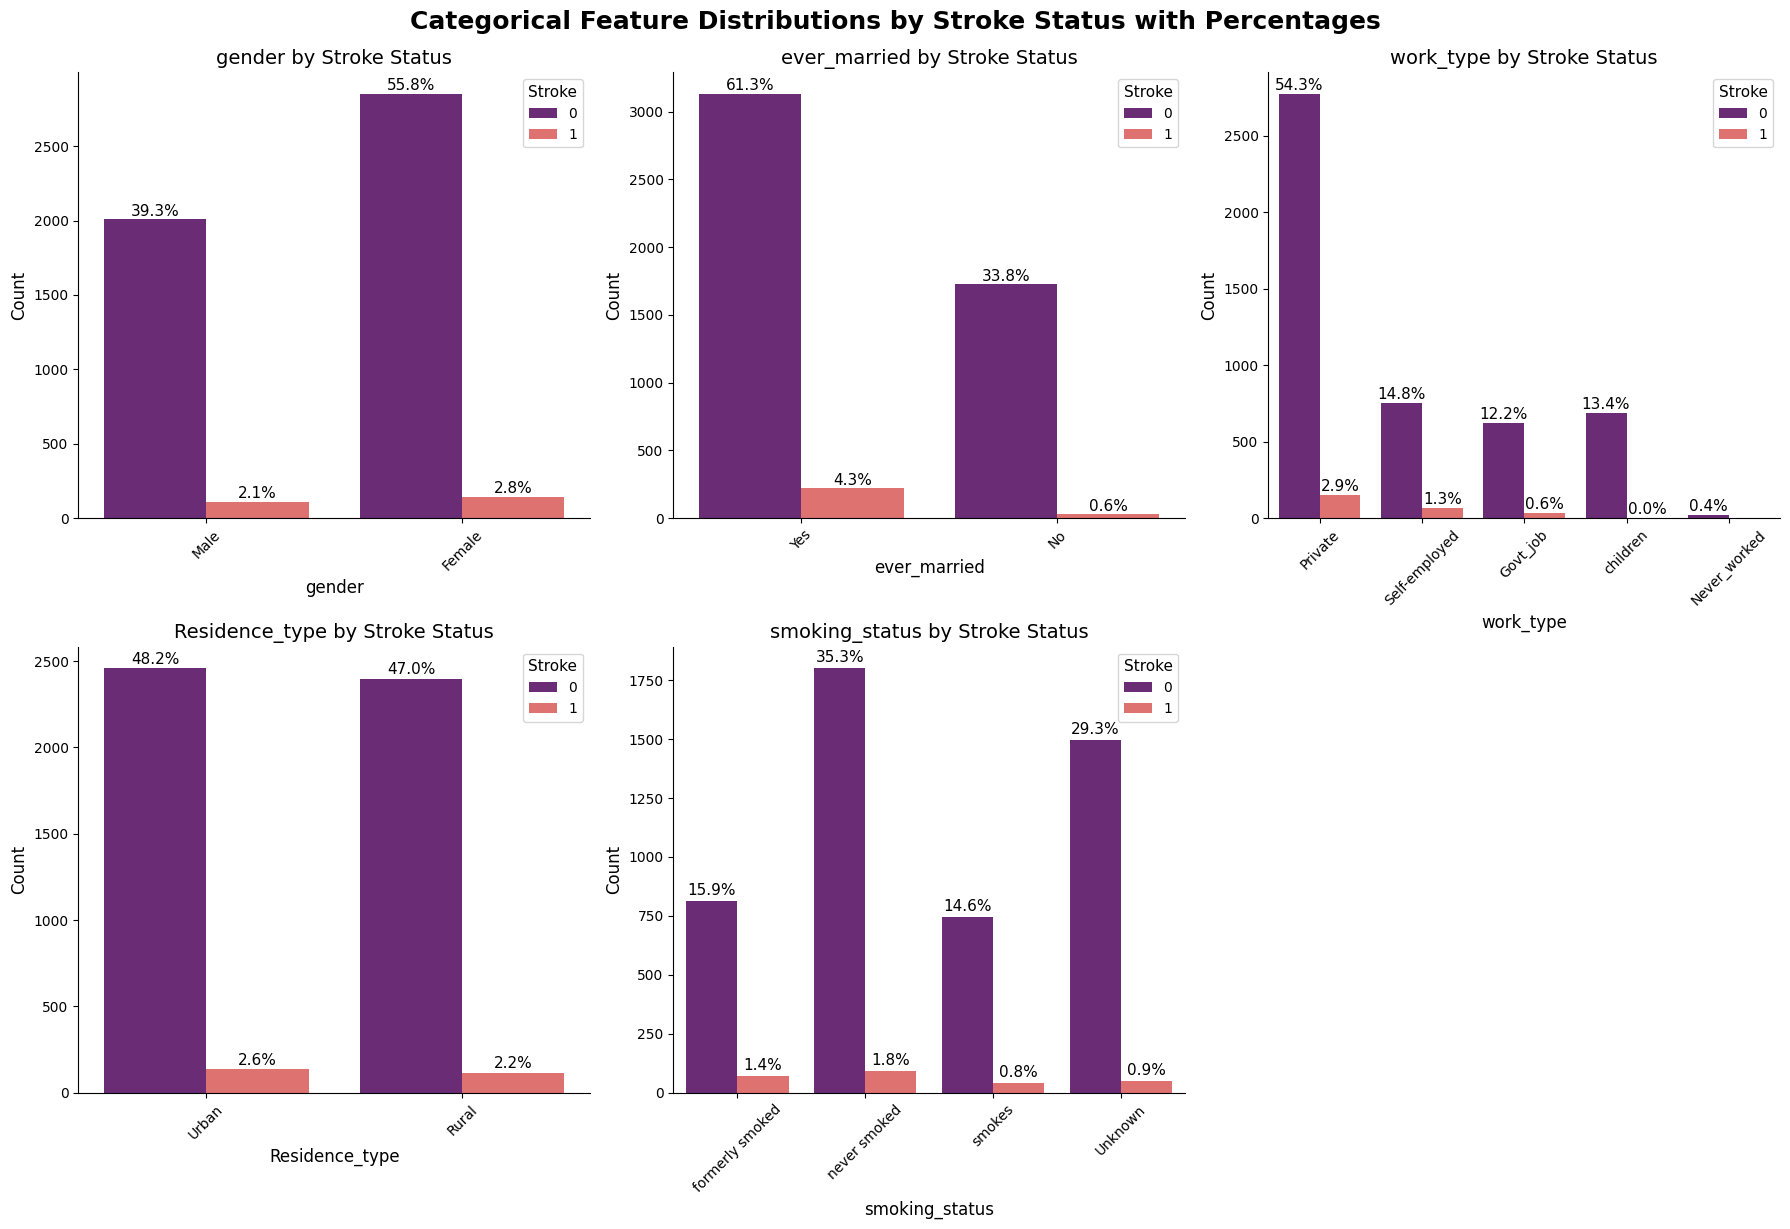

In [ ]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols, 1):
    n_colors = df["stroke"].nunique()
    palette = sns.color_palette("magma", n_colors=n_colors)

    plt.subplot(2, 3, i)
    ax = sns.countplot(x=col, hue="stroke", data=df, palette=palette)
    plt.title(f"{col} by Stroke Status", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Stroke", fontsize=10, title_fontsize=11)

    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percent = 100 * height / total
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + total * 0.005,
                f"{percent:.1f}%",
                ha="center",
                fontsize=11,
            )
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.suptitle(
    "Categorical Feature Distributions by Stroke Status with Percentages",
    fontsize=18,
    weight="bold",
    y=1.02,
)
plt.show()

**Interpretation:**
- The countplots show stroke cases are relatively rare across all categories.
- Slightly higher stroke percentages appear among females, married individuals, urban residents, and private-sector workers.
- Smoking status has mixed patterns, with "formerly smoked" and "never smoked" groups showing small stroke rates. 







/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_25469/3116743346.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Stroke Rate', data=prop_df, palette=palette, ax=ax)
/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_25469/3116743346.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Stroke Rate', data=prop_df, palette=palette, ax=ax)
/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_25469/3116743346.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Stroke Rate', data=prop_df

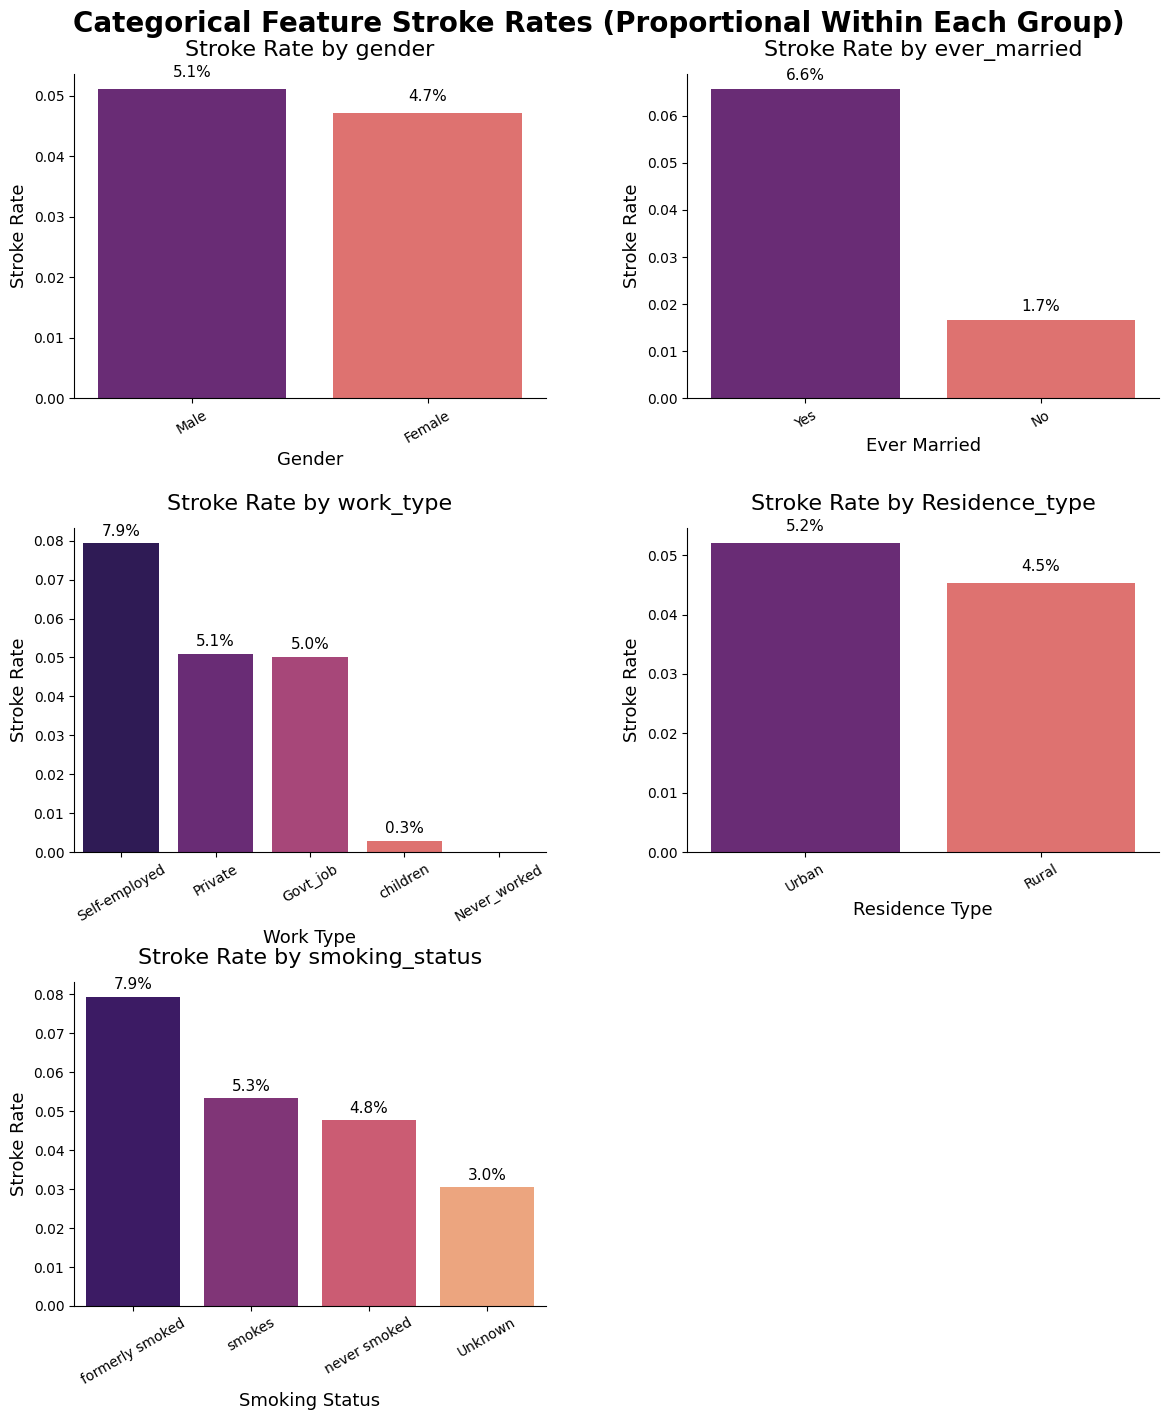

In [ ]:
# Define grid layout: 3 rows, 2 columns
n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 16))

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]

    # Calculate stroke rate within each group
    prop_df = (
        df.groupby(col)["stroke"]
        .mean()
        .reset_index()
        .rename(columns={"stroke": "Stroke Rate"})
    ).sort_values("Stroke Rate", ascending=False)

    n_colors = prop_df[col].nunique()
    palette = sns.color_palette("magma", n_colors=n_colors)

    sns.barplot(x=col, y="Stroke Rate", data=prop_df, palette=palette, ax=ax)

    ax.set_title(f"Stroke Rate by {col}", fontsize=16, y=1.03)
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=13)
    ax.set_ylabel("Stroke Rate", fontsize=13)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis="x", rotation=30)

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + 0.002,
                f"{height*100:.1f}%",
                ha="center",
                fontsize=11,
            )

# Hide unused subplot if cat_cols < 6
if len(cat_cols) < len(axes):
    for j in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle(
    "Categorical Feature Stroke Rates (Proportional Within Each Group)",
    fontsize=20,
    weight="bold",
    y=0.92,
)
plt.show()

**Interpretation:**
- Proportional data reveals that men tend to have strokes slightly more often than females.
- Married people more than three times are more likely to have a stroke.
- Self-employed workers have the highest risk of having a stroke.
- Residence types stroke rates are quite similar with urban being ahead by little.
- Former smokers suffers from strokes most commonly.

**Hypotheses Approval:**

- H2 **weakly supported** (Males tend to have higher stroke rates). Stroke risk is slightly higher in males than females in this dataset.
- H4 **supported** (Smokers or former smokers have increased chance of having a stroke). Any history of smoking, especially former smoking, is associated with elevated stroke risk, providing support for the hypothesis.

### Age Groups by Stroke Status

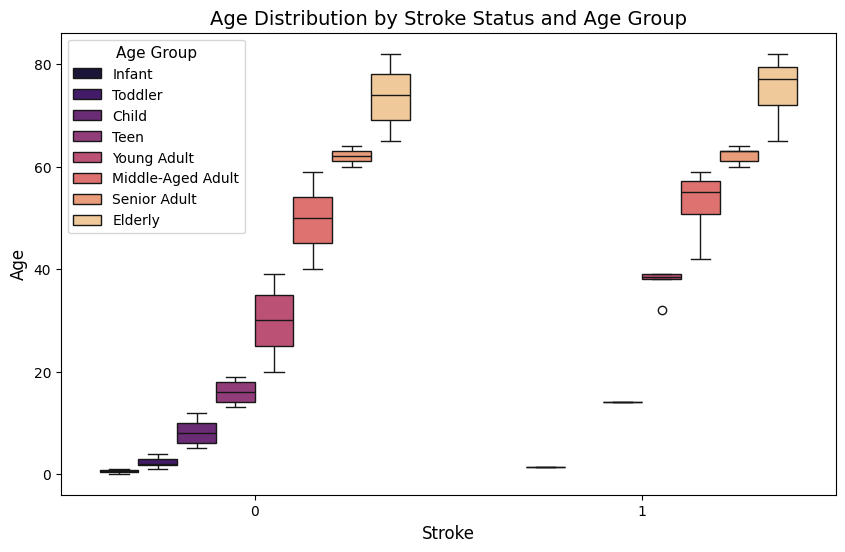

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="stroke", y="age", data=df, hue="age_group", palette="magma")
plt.title("Age Distribution by Stroke Status and Age Group", fontsize=14)
plt.xlabel("Stroke", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Age Group", fontsize=10, title_fontsize=11)
plt.show()

**Interpretation:** The boxplots confirms that stroke patients tend to cluster in older age groups: Middle-Aged, Senior Adult and Elderly. Younger groups are almost non-existing within stroke positive subplot with few exceptions.  

**Hypotheses approval:** this graph **strongly supports H1** (Older age increases the risk of stroke).

## Binary Variables by Stroke

/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_25469/3218097408.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Stroke Rate', data=prop_df, palette=palette, ax=ax)
/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_25469/3218097408.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Stroke Rate', data=prop_df, palette=palette, ax=ax)


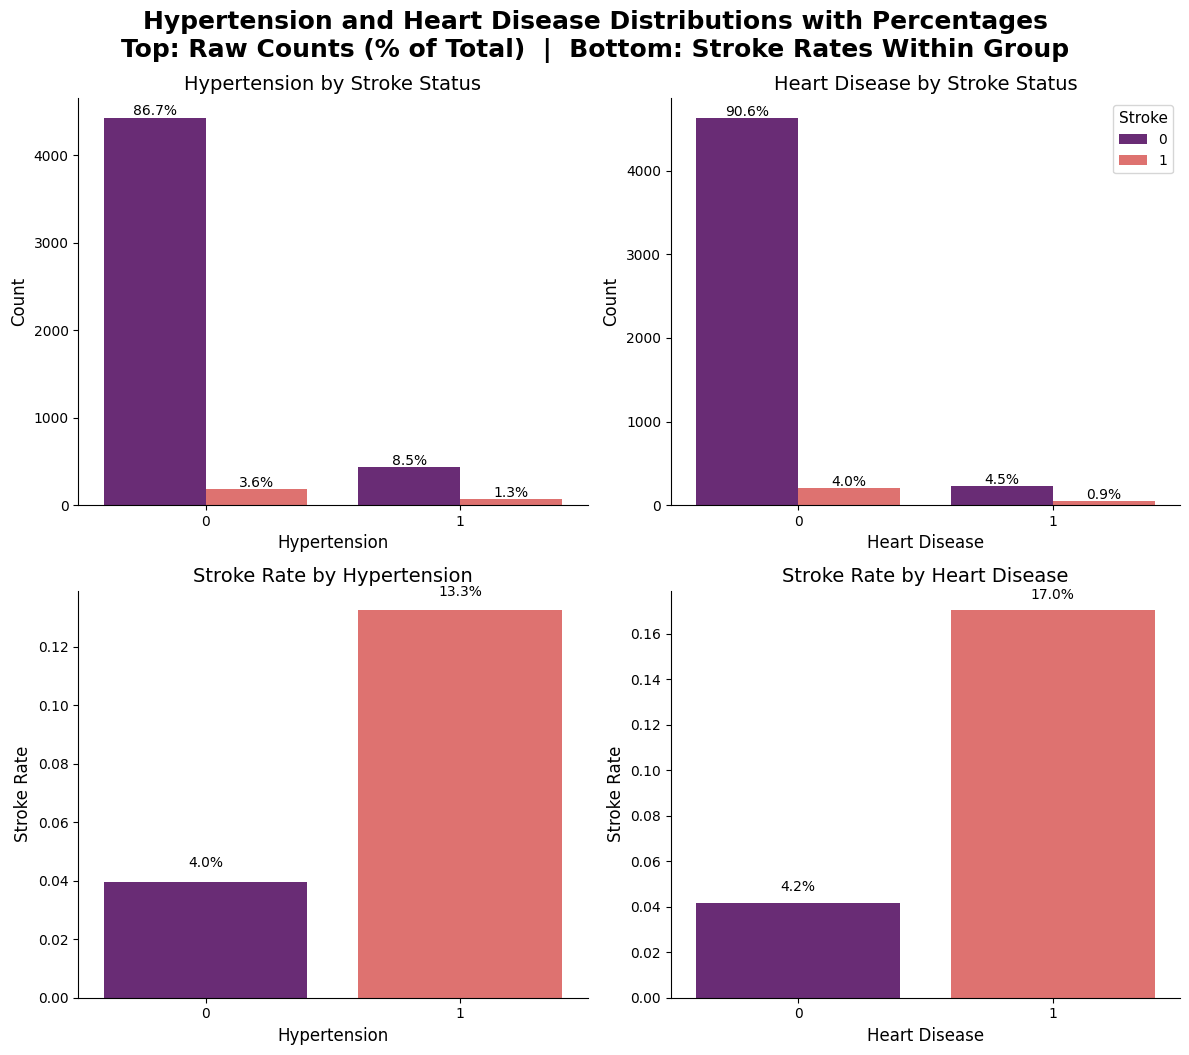

In [ ]:
# Define binary columns
binary_cols = ["hypertension", "heart_disease"]

# Define color palette
palette = sns.color_palette("magma", n_colors=2)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
total = len(df)

# --- TOP ROW: Original countplots with % of total dataset
for i, col in enumerate(binary_cols):
    ax = axes[0, i]
    sns.countplot(x=col, hue="stroke", data=df, palette=palette, ax=ax)
    ax.set_title(f"{col.replace('_', ' ').title()} by Stroke Status", fontsize=14)
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    # Remove top and right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Only show legend on right plot
    if i == 1:
        ax.legend(title="Stroke", fontsize=10, title_fontsize=11)
    else:
        ax.get_legend().remove()

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percent = 100 * height / total
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + total * 0.005,
                f"{percent:.1f}%",
                ha="center",
                fontsize=10,
            )

# --- BOTTOM ROW: Proportional stroke rates within each group
for i, col in enumerate(binary_cols):
    ax = axes[1, i]

    # Calculate stroke rate within each group
    prop_df = (
        df.groupby(col)["stroke"]
        .mean()
        .reset_index()
        .rename(columns={"stroke": "Stroke Rate"})
    )
    sns.barplot(x=col, y="Stroke Rate", data=prop_df, palette=palette, ax=ax)
    ax.set_title(f"Stroke Rate by {col.replace('_', ' ').title()}", fontsize=14)
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=12)
    ax.set_ylabel("Stroke Rate", fontsize=12)

    # Remove top and right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + 0.005,
                f"{height*100:.1f}%",
                ha="center",
                fontsize=10,
            )

plt.tight_layout()
plt.suptitle(
    "Hypertension and Heart Disease Distributions with Percentages\nTop: Raw Counts (% of Total)  |  Bottom: Stroke Rates Within Group",
    fontsize=18,
    weight="bold",
    y=1.05,
)
plt.show()

**Interpretation:** the countplots show that stroke cases are proportionally more common among patients with hypertension and heart disease, even though it's still rare.

**Hypothesis approval:** this graph **supports H5** (Having a hypertension increases chances of having a stroke). Stroke rate in hypertension=1 group: 4.0%. Stroke rate in hypertension=1 group: 13.2%. Stroke rate among hypertensives is about 3x higher.